In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

from sklearn.ensemble import RandomForestClassifier

# Cria vários modelos de Desision Tree
* O diferencial do RandomForest pro DecisionTree é que o RandomForest cria várias arvores de decisão baseadas em vários critérios de parametrização, e o resultado é a média de todos os modelos gerados

In [2]:
df = pd.read_csv("datasets/Credit.csv")

In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


* Temos a variável `class` que vamos remover do dataframe localizada na posição 21.
* Então vamos pegar todas as variáveis, exceto a da posição 21. 

In [4]:
previsores = df.iloc[:,0:20].values
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

* Criando um array somente com as classes agora

In [5]:
classe =  df.iloc[:,20].values
classe

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

* Vamos utilizar o `LabelEncoder()` para transformar as variáveis categóricas em numéricas.

In [6]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

In [7]:
labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

In [8]:
labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

In [9]:
labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

In [10]:
labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

In [11]:
labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

In [12]:
labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

In [13]:
labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

In [14]:
labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

In [15]:
labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

In [16]:
labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

In [17]:
labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

In [18]:
labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [19]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [20]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [21]:
X_treinamento

array([[1, 24, 1, ..., 2, 1, 1],
       [0, 36, 3, ..., 1, 1, 1],
       [2, 15, 1, ..., 2, 1, 1],
       ...,
       [0, 9, 3, ..., 1, 0, 1],
       [1, 18, 1, ..., 1, 0, 1],
       [1, 36, 2, ..., 2, 1, 1]], dtype=object)

In [22]:
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

* Vamos criar um modelo treinado gerando a tabela de probabilidades

In [23]:
floresta = RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1)

* `n_jobs` com o valor -1 significa utilizar todos os cores dos processadores disponíveis
* `n_estimators` são o numero de arvores que serão criadas. "Quanto mais, melhor"

In [24]:
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [25]:
floresta.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

* Exportando o arquivo .dot para visualização futura da arvore
* Copiar o conteudo do .dot e colar na URL http://www.webgraphviz.com/?source=techstories.org

In [26]:
previsoes = floresta.predict(X_teste)

In [34]:
#previsoes

* Gerando a Matriz de Confusão para medir a accuracy do modelo

In [28]:
confusao = confusion_matrix(y_teste, previsoes)

In [29]:
confusao

array([[ 37,  49],
       [ 17, 197]])

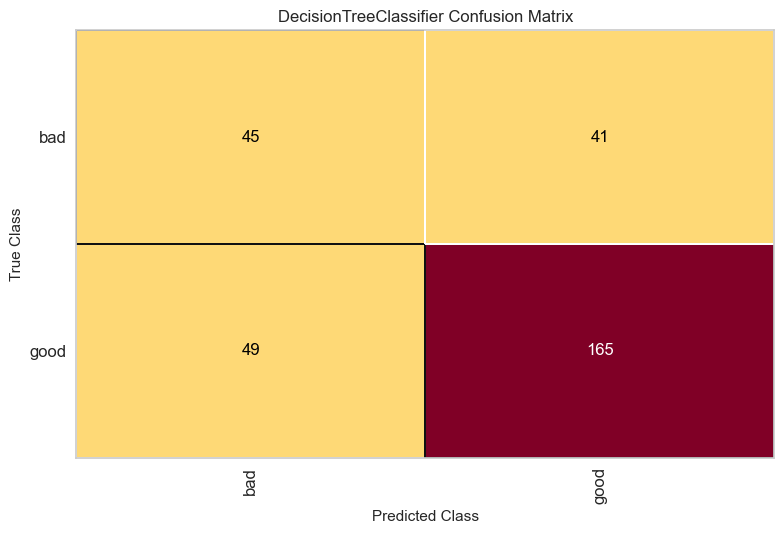

In [30]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof();

* Printando a Matriz de Confusão podemos verificar melhor a performance do modelo. 
    * Clientes que eram `bad` e foram classificados como `bad` foram 42.  
    * Clientes que eram `bad` e foram classificados como `good` foram 44.
    * Clientes que eram `good` e foram classificados como `bad` foram 55.
    * Clientes que eram `good` e foram classificados como `good` foram 159.

In [31]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto

In [32]:
taxa_acerto * 100

78.0

In [33]:
taxa_erro * 100

21.999999999999996